# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

###  Считать данные из csv-файла в датафрейм и просмотр данных

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### вывод основной информации

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.shape

(23699, 22)

In [5]:
df.isna().values.any()
# есть ли пропуски вообще

True

In [6]:
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
# не правильно названная колонка

### гистограммы

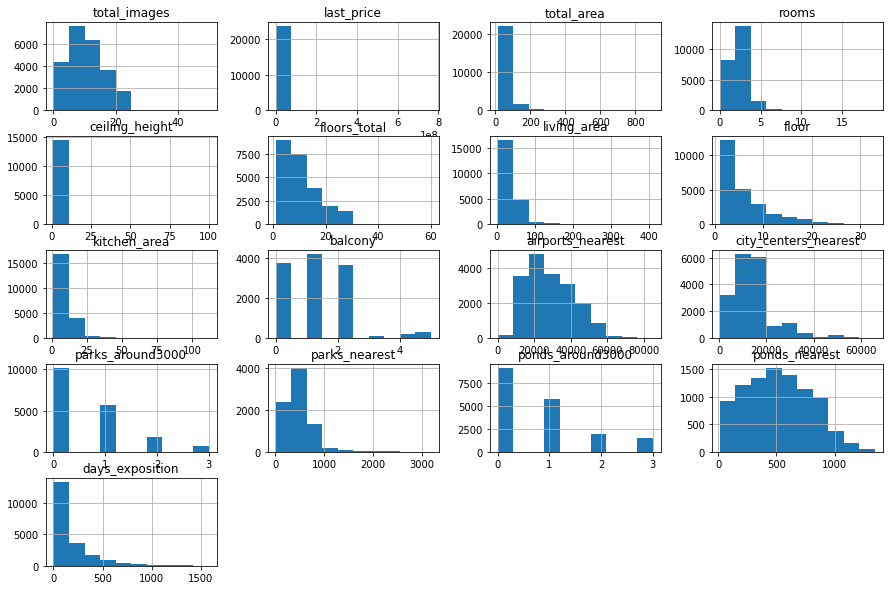

In [7]:
df.hist(figsize=(15, 10))    
plt.show()

## Предобработка данных

### Найти и изучить пропуски данных

#### найдем где есть пропуски

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(df.isna().mean()*100, 0)).style.background_gradient('coolwarm')

# Большое спасибо за отличную визуализацию !!!!!

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**пропуски в колонках:**
- [x] ceiling_height
- [x] floors_total
- [x] living_area
- [x] is_apartment
- [x] kitchen_area
- [x] balcony
- [x] locality_name
- [x] airports_nearest         
- [x] city_centers_nearest      
- [x] parks_around3000         
- [x] parks_nearest           
- [x] ponds_around3000         
- [x] ponds_nearest           
- [x] days_exposition 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

#### уберем явные пропуски , где забыли написать 0

In [10]:
df['is_apartment'].fillna(False, inplace=True)
df['balcony'].fillna(0.0, inplace=True)
df['parks_around3000'].fillna(0.0, inplace=True)
df['ponds_around3000'].fillna(0.0, inplace=True)


In [11]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### заполним высоту средним 

In [12]:
df['ceiling_height'].sort_values().unique()

df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### функции для 2х новых столбцов (понадобятся для заполнения пропусков)

##### 1я функция для определения типа площади

In [13]:
def type_of_area(area):
    if area <= 70:
        return 'small area'
    elif area > 70 and area <= 150:
        return 'mid area'
    elif area > 150:
        return 'big area'

In [14]:
df['type_area'] = df['total_area'].apply(type_of_area)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,mid area
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,small area
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,small area
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,big area
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,mid area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,mid area
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,small area
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,small area
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,mid area


##### 2я для определения типа цены

In [15]:
def type_of_price(price):
    if price <= 15000000:
        return 'small price'
    elif price > 15000000 and price <= 100000000:
        return 'mid price'
    elif price > 100000000:
        return 'big price'


In [16]:
df['type_price'] = df['last_price'].apply(type_of_price)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,mid area,small price
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,small area,small price
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,small area,small price
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,big area,mid price
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,mid area,small price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,mid area,small price
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,small area,small price
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,small area,small price
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,mid area,small price


##### заплнение пропусков на основе новых столбцов

In [17]:
for area in df['type_area'].unique():
    for price in df['type_price'].unique():
        df.loc[(df['type_area'] == area) \
                 & (df['type_price'] == price) \
                 & (df['living_area'].isna()), 'living_area'] \
        = df.loc[(df['type_area'] == area) \
                 & (df['type_price'] == price), 'living_area'].mean()

for area in df['type_area'].unique():
    for price in df['type_price'].unique():
        df.loc[(df['type_area'] == area) \
                 & (df['type_price'] == price) \
                 & (df['days_exposition'].isna()), 'days_exposition'] \
        = df.loc[(df['type_area'] == area) \
                 & (df['type_price'] == price), 'days_exposition'].mean()

for area in df['type_area'].unique():
    for price in df['type_price'].unique():
        df.loc[(df['type_area'] == area) \
                 & (df['type_price'] == price) \
                 & (df['kitchen_area'].isna()), 'kitchen_area'] \
        = df.loc[(df['type_area'] == area) \
                 & (df['type_price'] == price), 'kitchen_area'].mean()
df.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
type_area                   0
type_price                  0
dtype: int64

**можно было бы написать функцию , но так быстрее было**

#### эти поля нельзя заполнить без модели , решил удалить эти записи

In [18]:
print(df.shape)
df.dropna(subset=['locality_name', 'floors_total'], inplace=True)
print(df.shape)
df.isna().sum()

(23699, 24)
(23565, 24)


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
type_area                   0
type_price                  0
dtype: int64

**Этот блок кода мне был нужен для проверки и выверки значений для очистики не явных дублей**

In [19]:
a = list(df['locality_name'].sort_values().unique())
b = []
for i in range(len(a)):
    if 'Садко' in a[i]:
        print(a[i])
b = []
for i in range(len(a)):
    if len(a[i].split(' ')) == 1:
        b.append(a[i])
#     match = re.search(pattern, string)

b
for i in range(len(a)):
    for j in b:
        if j in a[i]:
            print(a[i])

садовое товарищество Садко
Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Кронштадт
Кудрово
Ломоносов
Луга
Любань
Мурино
Никольское
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сясьстрой
Тихвин
Тосно
Шлиссельбург
деревня Кудрово
поселок Кингисеппский
поселок Коммунары
поселок Любань
поселок Мурино
поселок Усть-Луга
посёлок Мурино
посёлок Усть-Луга
село Никольское
село Русско-Высоцкое


#### убираем из названий не явные дубли 

In [20]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

df['locality_name'] = df['locality_name'].str.replace('деревня ', 'поселок ')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции ', 'поселок станции ')
df['locality_name'] = df['locality_name'].str.replace('село ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ', 'поселок ')
df['locality_name'] = df['locality_name'].str.replace('городской поселок ', 'поселок ')

df['locality_name'] = df['locality_name'].str.replace('поселок Кудрово', 'Кудрово')
df['locality_name'] = df['locality_name'].str.replace('поселок Любань', 'Любань')
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино', 'Мурино')
df['locality_name'] = df['locality_name'].str.replace('поселок Павлово', 'Павлово')



df['locality_name'].value_counts()

Санкт-Петербург             15651
Мурино                        586
Кудрово                       470
поселок Шушары                439
Всеволожск                    398
                            ...  
поселок Старое Хинколово        1
поселок Вахнова Кара            1
поселок Кисельня                1
поселок Ялгино                  1
поселок станции Корнево         1
Name: locality_name, Length: 309, dtype: int64

In [21]:
df[df.duplicated()] # явных дублей нет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price


#### заполняем пропуски с помощью функции по названиям населенных пунктов

##### где получится

In [22]:
def fill_nan(df, col):
    for city in df['locality_name'].unique():
        df.loc[(df['locality_name'] == city) \
                 & (df[col].isna()), col] \
        = df.loc[(df['locality_name'] == city), col].mean()

In [23]:
columns = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']          
for col in columns:
    fill_nan(df, col)

df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
city_centers_nearest    5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition            0
type_area                  0
type_price                 0
dtype: int64

##### где не получилось ставим 0 , тк среднее = 0 

In [24]:
df['airports_nearest'].fillna(0.0, inplace=True)
df['city_centers_nearest'].fillna(0.0, inplace=True)
df['parks_nearest'].fillna(0.0, inplace=True)
df['ponds_nearest'].fillna(0.0, inplace=True)
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
type_area               0
type_price              0
dtype: int64

In [25]:
df.isna().values.any()

False

####  вывод

так как некоторые данные записываются людьми , человеческий фактор

### Изменение типа данных

#### немного обрежим числа после запятых

In [26]:
pd.set_option('display.max_columns', None)
df

df['living_area'] = df['living_area'].apply(lambda x: '{0:.2f}'.format(x))
df['kitchen_area'] = df['kitchen_area'].apply(lambda x: '{0:.2f}'.format(x))
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,224.390172,mid area,small price
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,573.217105,81.000000,small area,small price
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.000000,small area,small price
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,124.73,9,False,False,False,25.96,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.000000,big area,mid price
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.000000,mid area,small price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.000000,224.390172,mid area,small price
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,False,False,8.50,0.0,Тосно,0.0,0.0,0.0,0.0,0.0,0.000000,45.000000,small area,small price
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,False,False,8.99,0.0,Рождествено,0.0,0.0,0.0,0.0,0.0,0.000000,164.423317,small area,small price
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,51.98,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.000000,602.000000,mid area,small price


In [27]:
df['living_area'] = pd.to_numeric(df['living_area'])
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'])

#### переведем в челочисленный тип тк не нужна плавующая запятая

In [28]:
columns = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
df[columns] = df[columns].astype('int')

#### приведем в нормальную дату

In [29]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price


#### приведем в порядок понятные аномалии 

In [30]:
df.loc[df['living_area'] < 5, 'living_area'] = df.loc[df['living_area'] < 5, 'living_area'].multiply(10)
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height'].multiply(0.1)
df = df[df['ceiling_height'] > 1]

# слишном высокие потолки и низкие
# слишком маленькие желые зоны

**некоторык значения лучше переводить в инт так они не нуждаются в плав. запятых**
**так же более читабельный вариант даты приятнее видеть и из него легче забирать инфу**

## Посчитайте и добавьте в таблицу новые столбцы

### стоимость кв метра

In [31]:
df['price_one_m'] = df['last_price'] / df['total_area']

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price,price_one_m
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price,120370.370370
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price,92785.714286
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price,72490.845228
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price,52542.372881
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price,44091.710758
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price,149511.400651


### день недели

In [32]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price,price_one_m,day_of_week
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price,120370.370370,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price,82920.792079,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price,92785.714286,3
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price,408176.100629,4
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price,100000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price,72490.845228,1
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price,52542.372881,0
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price,44091.710758,6
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price,149511.400651,1


### месяц

In [33]:
df['month'] = df['first_day_exposition'].dt.month
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price,price_one_m,day_of_week,month
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price,120370.370370,3,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price,82920.792079,1,12
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price,92785.714286,3,8
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price,408176.100629,4,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price,100000.000000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price,72490.845228,1,3
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price,52542.372881,0,1
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price,44091.710758,6,2
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price,149511.400651,1,3


### год

In [34]:
df['year'] = df['first_day_exposition'].dt.year

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price,price_one_m,day_of_week,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price,120370.370370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price,82920.792079,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price,92785.714286,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price,408176.100629,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price,100000.000000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price,72490.845228,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price,52542.372881,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price,44091.710758,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price,149511.400651,1,3,2017


<AxesSubplot:>

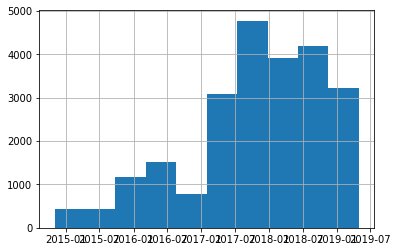

In [69]:
df['petya'] = df['first_day_exposition'].astype('datetime64[M]') 
df['petya'].hist()

### тип этажа

In [35]:
def type_of_floor(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else: return 'different'
    
df['type_floor'] = df.apply(type_of_floor, axis = 1)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price,price_one_m,day_of_week,month,year,type_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price,120370.370370,3,3,2019,different
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price,82920.792079,1,12,2018,first
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price,92785.714286,3,8,2015,different
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price,408176.100629,4,7,2015,different
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price,100000.000000,1,6,2018,different
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price,72490.845228,1,3,2017,different
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price,52542.372881,0,1,2018,different
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price,44091.710758,6,2,2018,first
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price,149511.400651,1,3,2017,different


### расстояние в км

In [36]:
df['city_centers_nearest_km'] = df['city_centers_nearest'] // 1000
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,type_price,price_one_m,day_of_week,month,year,type_floor,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,224,mid area,small price,120370.370370,3,3,2019,different,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,0,0,573,81,small area,small price,82920.792079,1,12,2018,first,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,small area,small price,92785.714286,3,8,2015,different,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,124.73,9,False,False,False,25.96,0,Санкт-Петербург,28098,6800,2,84,3,234,424,big area,mid price,408176.100629,4,7,2015,different,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,mid area,small price,100000.000000,1,6,2018,different,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,224,mid area,small price,72490.845228,1,3,2017,different,4
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,0,0,0,0,0,0,45,small area,small price,52542.372881,0,1,2018,different,0
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,8.99,0,Рождествено,0,0,0,0,0,0,164,small area,small price,44091.710758,6,2,2018,first,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,51.98,12,False,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,mid area,small price,149511.400651,1,3,2017,different,10


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

## Проведите исследовательский анализ данных

### изучение колонок

**Hist:**
- [x] total_area
- [x] living_area
- [x] kitchen_area
- [x] last_price
- [x] rooms
- [x] ceiling_height
- [x] floor
- [x] type_floor  
- [x] floors_total
- [x] city_centers_nearest      
- [x] airports_nearest         
- [x] parks_nearest           
- [x] day_of_week         
- [x] month           

#### видно распредение Пуассона , что в основном продаются квартиры общ. пл. 100квм

<AxesSubplot:ylabel='Frequency'>

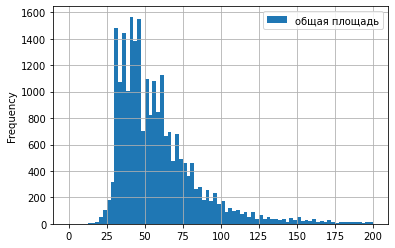

In [37]:
df.plot(kind='hist', y='total_area', bins=80, range=(0, 200), grid=True, legend=True, label='общая площадь')

#### жилые зоны в основном 40

<AxesSubplot:ylabel='Frequency'>

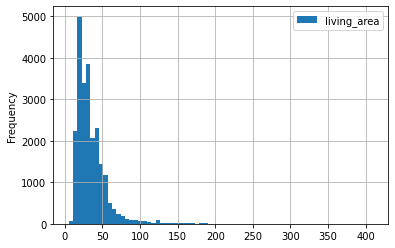

In [38]:
df.plot(kind='hist', y='living_area', bins=70, grid=True )

#### кухни еще меньше 15

<AxesSubplot:ylabel='Frequency'>

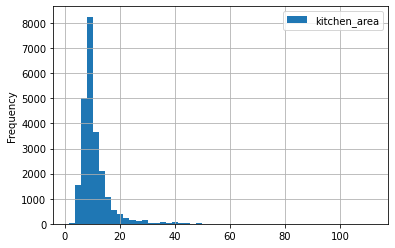

In [39]:
df.plot(kind='hist', y='kitchen_area', bins=50, grid=True )

#### а цены больше похожи на нрмальное распределение

<AxesSubplot:ylabel='Frequency'>

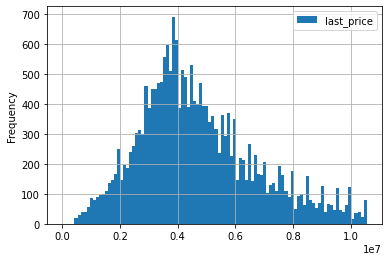

In [40]:
df.plot(kind='hist', y='last_price', range=(0, 10550000), bins=100, grid=True )

#### количество комнат разжелилось, больше всего 1, 2 и 3

<AxesSubplot:ylabel='Frequency'>

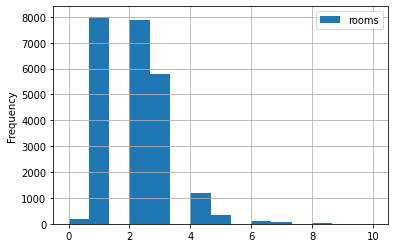

In [41]:
df.plot(kind='hist', y='rooms', range=(0, 10), bins=15, grid=True )

#### с высотой квартир тоже понятно , в основном 2.5 м

<AxesSubplot:ylabel='Frequency'>

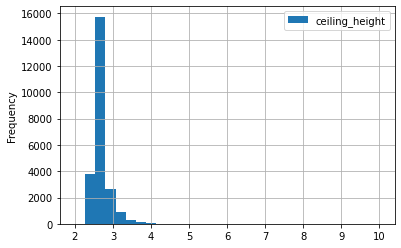

In [42]:
df.plot(kind='hist', y='ceiling_height', range=(2, 10), bins=30, grid=True )

#### тут видим что в Питере очень много до 5 этажей и мало высоко этажных зданий

<AxesSubplot:ylabel='Frequency'>

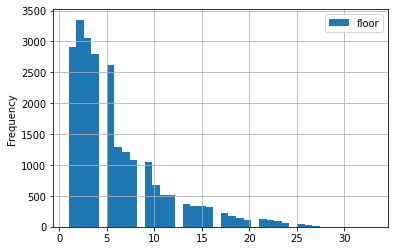

In [43]:
df.plot(kind='hist', y='floor', bins=40, grid=True )

#### как не странно , больше всего этажей больше 1 ого и ниже последнего 

<AxesSubplot:>

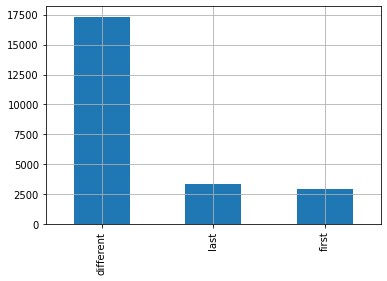

In [44]:
df['type_floor'].value_counts().plot.bar(grid=True)

#### и мало небоскребов)

<AxesSubplot:ylabel='Frequency'>

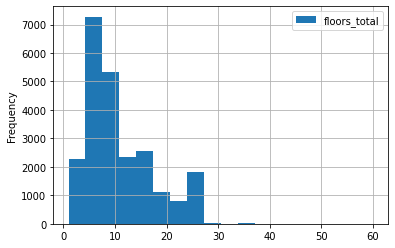

In [45]:
df.plot(kind='hist', y='floors_total', bins=18, grid=True )

#### много квартир в центре и мало на окраине 

<AxesSubplot:ylabel='Frequency'>

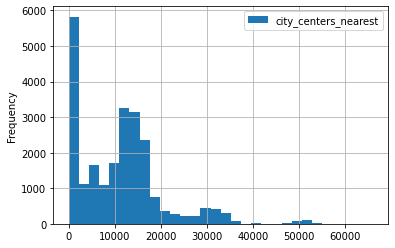

In [46]:
df.plot(kind='hist', y='city_centers_nearest', bins=30, grid=True )

#### есть группа квартир у аэрапорта

<AxesSubplot:ylabel='Frequency'>

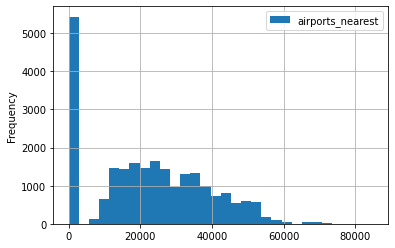

In [47]:
df.plot(kind='hist', y='airports_nearest', bins=30, grid=True )

#### много парков в переделах км

<AxesSubplot:ylabel='Frequency'>

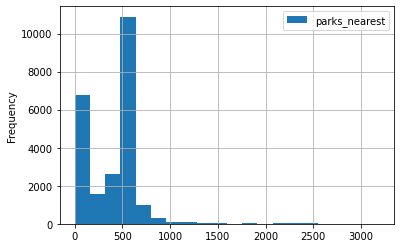

In [48]:
df.plot(kind='hist', y='parks_nearest', bins=20, grid=True )

#### в основном продажи в будни

<AxesSubplot:ylabel='Frequency'>

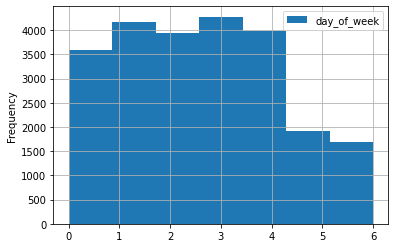

In [49]:
df.plot(kind='hist', y='day_of_week', bins=7, grid=True )

#### и продажи в основном не летом (там отпуски)

<AxesSubplot:ylabel='Frequency'>

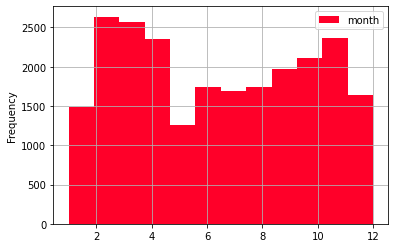

In [50]:
df.plot(kind='hist', y='month', bins=12, grid=True, colormap="gist_rainbow")

#### как зависят между собой переменные

In [51]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,day_of_week,month,year,city_centers_nearest_km
total_images,1.000000,0.105031,0.116979,0.099765,0.050536,0.009813,0.103077,0.032771,0.010405,-0.028198,-0.024668,0.106611,0.046909,0.041841,0.002926,0.037172,0.047115,0.011742,0.044460,-0.019975,0.133184,-0.009311,0.004439,0.139215,0.001628
last_price,0.105031,1.000000,0.653621,0.363190,0.256905,-0.006744,0.581019,0.026842,0.026981,-0.025084,-0.008801,0.491077,0.008567,0.113951,-0.048285,0.198308,0.126003,0.209298,0.090650,0.094341,0.736800,0.001356,0.002728,-0.042863,-0.052969
total_area,0.116979,0.653621,1.000000,0.758735,0.343339,-0.075251,0.929816,-0.024367,0.029748,-0.072001,-0.034943,0.618878,0.010240,0.097657,-0.074898,0.201367,0.109793,0.201570,0.076476,0.163143,0.302572,-0.005682,0.004968,-0.079037,-0.079597
rooms,0.099765,0.363190,0.758735,1.000000,0.211613,-0.227913,0.828459,-0.151341,0.000399,-0.146069,-0.087736,0.288264,-0.015544,0.049111,-0.059316,0.157968,0.067533,0.122005,0.063985,0.137285,0.055681,-0.005208,-0.003913,-0.054490,-0.062908
ceiling_height,0.050536,0.256905,0.343339,0.211613,1.000000,-0.073219,0.328312,-0.038423,0.083236,0.009503,-0.001890,0.290626,-0.030740,0.044962,-0.115276,0.218791,0.068372,0.191961,0.049948,0.102138,0.267959,-0.016319,-0.001294,-0.046645,-0.119337
floors_total,0.009813,-0.006744,-0.075251,-0.227913,-0.073219,1.000000,-0.158879,0.678009,-0.026402,0.070224,0.050845,0.144811,0.173414,0.164679,0.097735,-0.158387,0.132727,-0.048705,0.133994,-0.050610,0.148422,0.012545,0.016900,0.007878,0.096077
living_area,0.103077,0.581019,0.929816,0.828459,0.328312,-0.158879,1.000000,-0.088357,0.030047,-0.054277,-0.025892,0.460646,-0.010960,0.074766,-0.082082,0.212324,0.088829,0.187465,0.073316,0.156208,0.240607,-0.006458,0.000592,-0.072994,-0.086688
floor,0.032771,0.026842,-0.024367,-0.151341,-0.038423,0.678009,-0.088357,1.000000,-0.013234,0.035947,0.036184,0.123101,0.171514,0.110505,0.062024,-0.105029,0.090555,-0.029728,0.088875,-0.036716,0.129201,0.011020,0.020726,0.005398,0.060866
is_apartment,0.010405,0.026981,0.029748,0.000399,0.083236,-0.026402,0.030047,-0.013234,1.000000,-0.003641,-0.002462,0.043167,0.032943,0.017313,0.008859,0.021643,-0.004952,0.024528,0.009209,0.014568,0.044794,-0.009474,0.002358,0.009291,0.008444
studio,-0.028198,-0.025084,-0.072001,-0.146069,0.009503,0.070224,-0.054277,0.035947,-0.003641,1.000000,-0.004216,-0.019595,0.030017,-0.031263,-0.019895,-0.032116,-0.017422,-0.009249,-0.018818,-0.021669,0.015529,-0.000859,-0.000713,0.010862,-0.019383


### скорость продаж

#### гистограмма дней продаж

<AxesSubplot:ylabel='Frequency'>

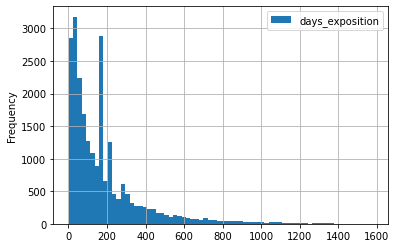

In [52]:
df.plot(kind='hist', y='days_exposition', bins=70, grid=True)

по графику можно понять , что больше всего квартир продается быстро в приделах 200 дней 

#### среднее и медиана

In [53]:
df.pivot_table(index=['type_area', 'type_price'], values='days_exposition', aggfunc=('mean', 'median'))

mean  median
type_area  type_price                     
big area   big price    349.028571   316.0
           mid price    307.235828   306.0
           small price  300.682353   300.0
mid area   big price    190.000000   190.0
           mid price    276.014388   277.0
           small price  224.421159   179.0
small area mid price    148.454545   129.0
           small price  164.277856   108.0

In [54]:
df.pivot_table(index='days_exposition', aggfunc=('mean', 'median'))

airports_nearest            balcony        ceiling_height  \
                            mean   median      mean median           mean   
days_exposition                                                             
1                   13567.000000  13567.0  0.000000    0.0       2.500000   
2                   29386.666667  36525.0  0.333333    0.0       2.883333   
3                   24052.273885  23368.0  0.668790    0.0       2.648153   
4                   20962.649425  19607.5  0.540230    0.0       2.705402   
5                   23138.019737  22822.5  0.631579    0.0       2.680132   
...                          ...      ...       ...    ...            ...   
1512                22184.000000  22184.0  0.000000    0.0       2.825000   
1513                39393.000000  39393.0  0.000000    0.0       3.000000   
1553                17101.000000  17101.0  0.000000    0.0       2.850000   
1572                21860.000000  21860.0  1.000000    1.0       2.650000   
1580                    0.000000      0.0  3.000000    3.0       2.500000   

                       city_centers_nearest          city_centers_nearest_km  \
                median                 mean   median                    mean   
days_exposition                                                                
1                2.500         14384.000000  14384.0               14.000000   
2                3.000         10453.000000  10302.0               10.000000   
3                2.650         12017.592357  11913.0               11.643312   
4                2.650         10577.729885  11537.5               10.178161   
5                2.650         10783.638158  11465.5               10.361842   
...                ...                  ...      ...                     ...   
1512             2.825         17695.000000  17695.0               17.500000   
1513             3.000         11096.000000  11096.0               11.000000   
1553             2.850         17110.000000  17110.0               17.000000   
1572             2.650           318.000000    318.0                0.000000   
1580             2.500             0.000000      0.0                0.000000   

                       day_of_week            floor        floors_total  \
                median        mean median      mean median         mean   
days_exposition                                                           
1                 14.0    2.000000    2.0  1.000000    1.0     9.000000   
2                 10.0    0.666667    1.0  4.000000    4.0     5.000000   
3                 11.0    3.121019    4.0  6.082803    5.0    11.324841   
4                 11.0    2.758621    3.0  5.971264    5.0    11.155172   
5                 11.0    3.144737    3.0  5.875000    4.0    11.164474   
...                ...         ...    ...       ...    ...          ...   
1512              17.5    3.000000    3.0  1.500000    1.5     5.000000   
1513              11.0    1.000000    1.0  7.000000    7.0     8.000000   
1553              17.0    1.000000    1.0  9.000000    9.0    17.000000   
1572               0.0    1.000000    1.0  5.000000    5.0     6.000000   
1580               0.0    0.000000    0.0  2.000000    2.0     5.000000   

                       is_apartment        kitchen_area            last_price  \
                median         mean median         mean  median          mean   
days_exposition                                                                 
1                  9.0          0.0    0.0    10.000000  10.000  4.000000e+06   
2                  5.0          0.0    0.0     7.496667   6.900  5.992000e+06   
3                  9.0          0.0    0.0     9.530828   8.700  5.068014e+06   
4                  9.0          0.0    0.0     9.542011   8.990  5.323743e+06   
5                  9.0          0.0    0.0    10.297434   8.990  6.485962e+06   
...                ...          ...    ...          ...     ...           ...   
1512               5.0          0.0 

мне нравится первая свод таблица , но до конца не понял задание (на первой таблице можно увидеть как меняется время продажи от типа цены и величены квартиры )

что интересно , самые быстро продаваемые квартиры с маленькой площатью и со средней площадью большой ценой

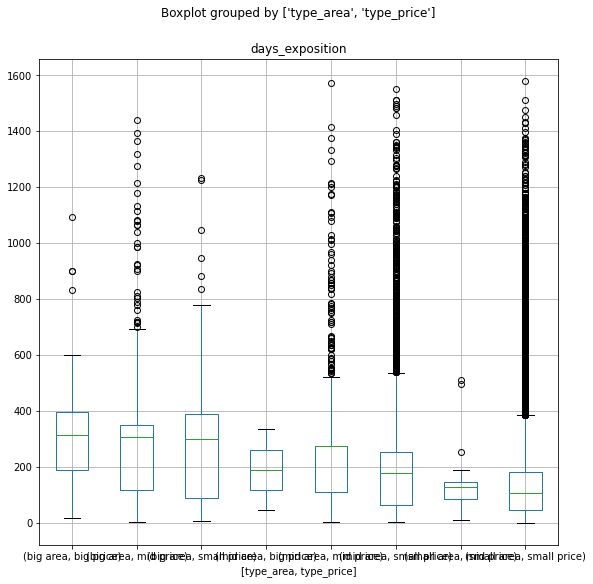

<AxesSubplot:>

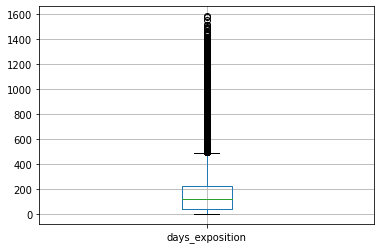

In [55]:
df.boxplot(column='days_exposition', by=['type_area', 'type_price'], figsize=(9, 9))
plt.show()
df.boxplot(column='days_exposition')

- Q1 у нас около 50 
- медиана около 100
- Q3 за 200

среднее время продажи 150 дней
много выбросов

In [56]:
df['days_exposition'].describe()

count    23564.000000
mean       182.317264
std        205.065164
min          1.000000
25%         45.000000
50%        124.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

так же это можно увидеть с помощью метода discribe

### зависимость цены от параметров

#### матрица корреляции

In [57]:
stat_df = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'first_day_exposition']]

stat_df.assign(type_floor=stat_df.type_floor.astype('category').cat.codes, first_day_exposition=stat_df.first_day_exposition.astype('category').cat.codes).corr()

,last_price,total_area,living_area,kitchen_area,rooms,type_floor,first_day_exposition
last_price,1.000000,0.653621,0.581019,0.491077,0.363190,0.002153,-0.042302
total_area,0.653621,1.000000,0.929816,0.618878,0.758735,0.033837,-0.079004
living_area,0.581019,0.929816,1.000000,0.460646,0.828459,0.057545,-0.074148
kitchen_area,0.491077,0.618878,0.460646,1.000000,0.288264,-0.050941,-0.057326
rooms,0.363190,0.758735,0.828459,0.288264,1.000000,0.073111,-0.056380
type_floor,0.002153,0.033837,0.057545,-0.050941,0.073111,1.000000,-0.013396
first_day_exposition,-0.042302,-0.079004,-0.074148,-0.057326,-0.056380,-0.013396,1.000000


можно увидеть , что больше всего зависимость с общей площадью 

#### графики

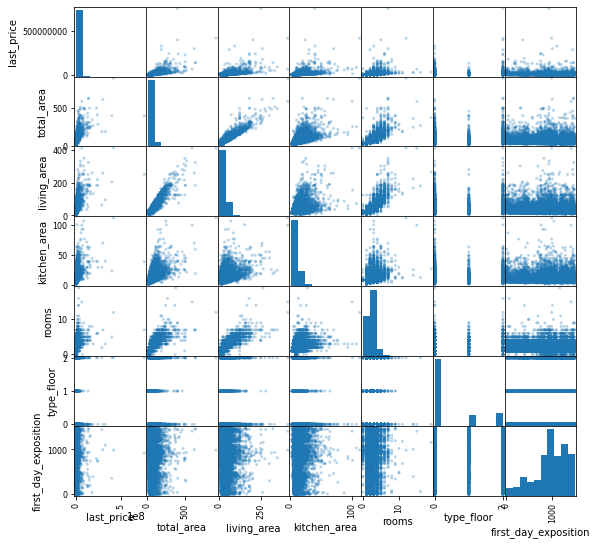

In [58]:
pd.plotting.scatter_matrix(stat_df.assign(type_floor=stat_df.type_floor.astype('category').cat.codes, first_day_exposition=stat_df.first_day_exposition.astype('category').cat.codes)
                           , alpha=0.3
                           , figsize=(9, 9))
plt.show()

видно что зависимост от параметров линейная и не сильно зависит от них цена

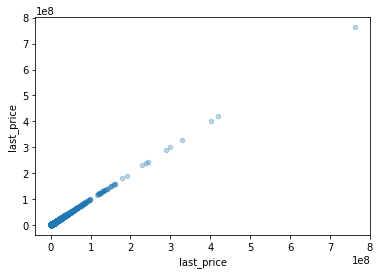

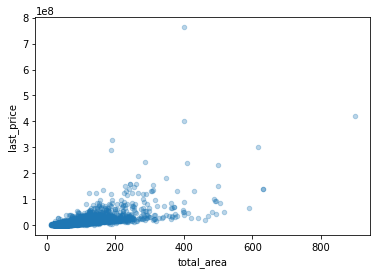

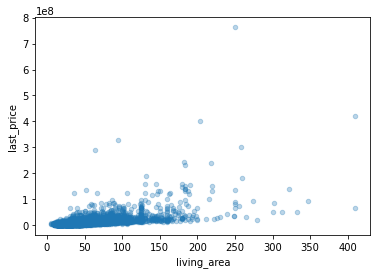

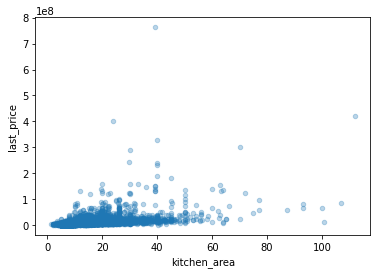

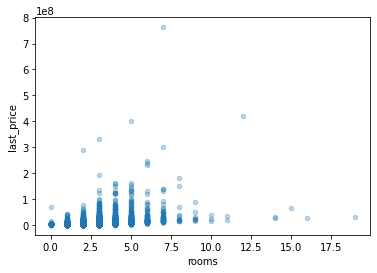

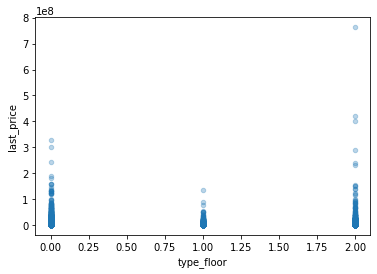

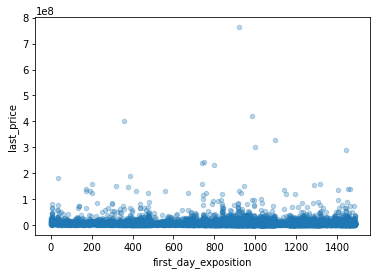

In [59]:
cat_stat_df = stat_df.assign(type_floor=stat_df.type_floor.astype('category').cat.codes, first_day_exposition=stat_df.first_day_exposition.astype('category').cat.codes)
for i in cat_stat_df.columns:
    cat_stat_df.plot(x=i, y='last_price', kind='scatter', alpha=0.3)
    plt.show()

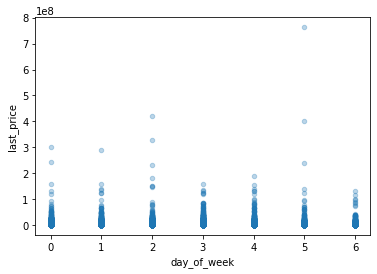

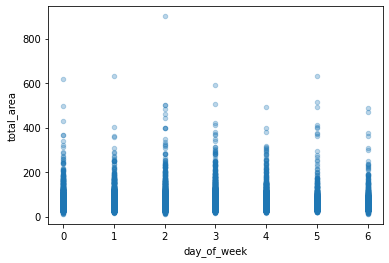

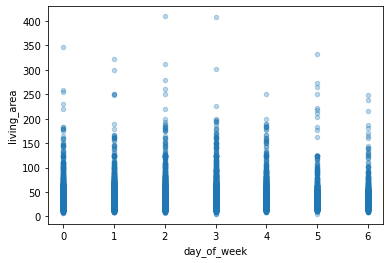

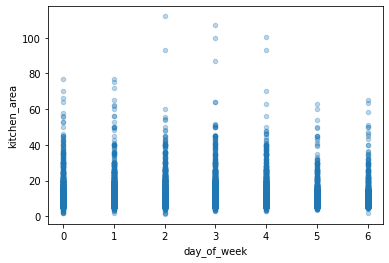

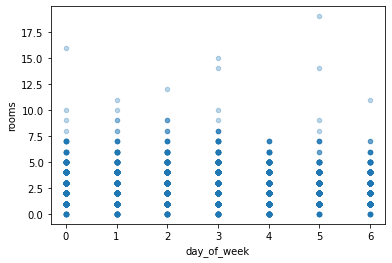

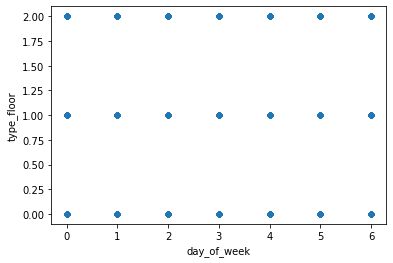

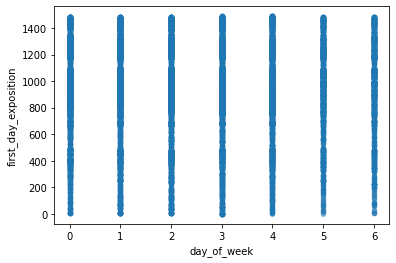

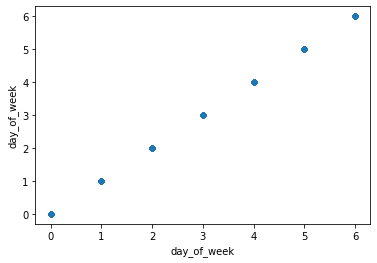

In [60]:
stat_df_day = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'first_day_exposition', 'day_of_week']]
stat_df_day = stat_df_day.assign(type_floor=stat_df_day.type_floor.astype('category').cat.codes, first_day_exposition=stat_df_day.first_day_exposition.astype('category').cat.codes)

for i in stat_df_day.columns:
    stat_df_day.plot(x='day_of_week', y=i, kind='scatter', alpha=0.3)
    plt.show()


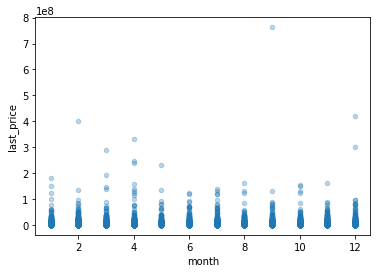

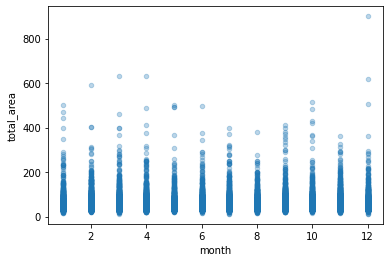

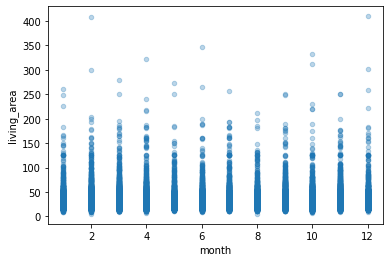

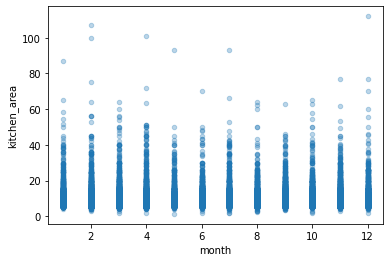

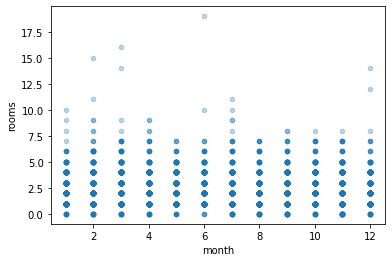

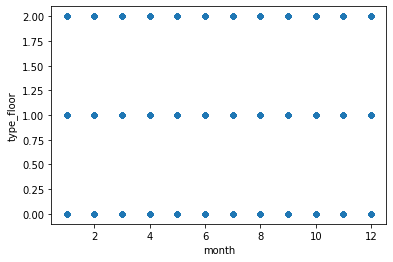

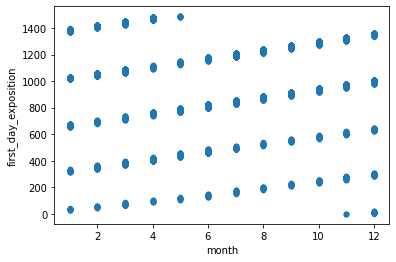

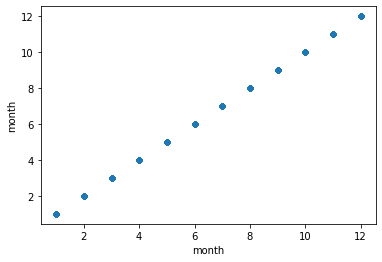

In [61]:
stat_df_month = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'first_day_exposition', 'month']]
stat_df_month = stat_df_month.assign(type_floor=stat_df_month.type_floor.astype('category').cat.codes, first_day_exposition=stat_df_month.first_day_exposition.astype('category').cat.codes)

for i in stat_df_month.columns:
    stat_df_month.plot(x='month', y=i, kind='scatter', alpha=0.3)
    plt.show()

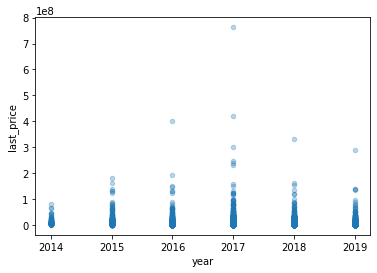

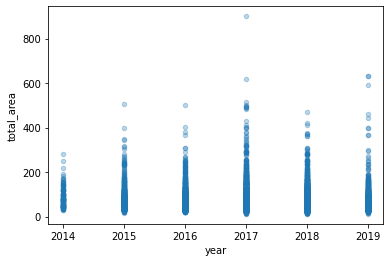

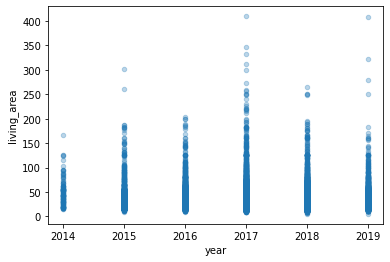

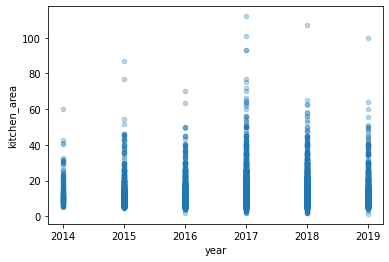

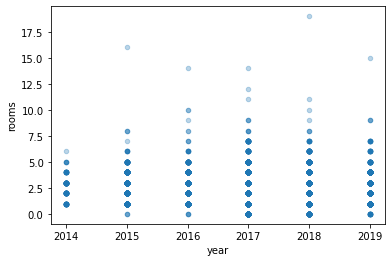

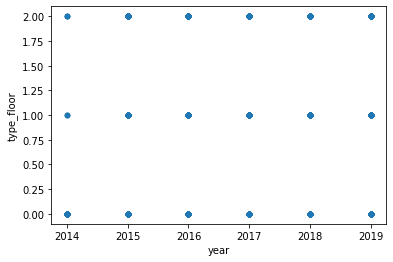

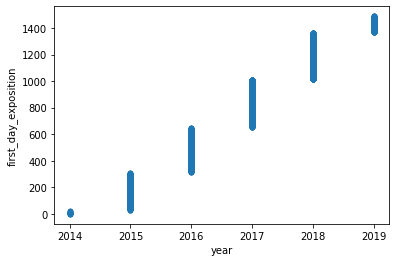

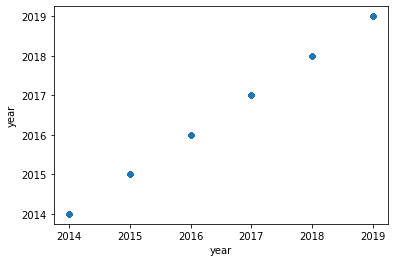

In [62]:
stat_df_year = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'first_day_exposition', 'year']]
stat_df_year = stat_df_year.assign(type_floor=stat_df_year.type_floor.astype('category').cat.codes, first_day_exposition=stat_df_year.first_day_exposition.astype('category').cat.codes)

for i in stat_df_year.columns:
    stat_df_year.plot(x='year', y=i, kind='scatter', alpha=0.3)
    plt.show()

#### визувлизация корреляции

<AxesSubplot:>

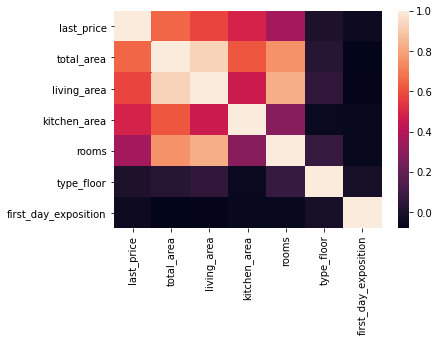

In [63]:
sns.heatmap(stat_df.assign(type_floor=stat_df.type_floor.astype('category').cat.codes, first_day_exposition=stat_df.first_day_exposition.astype('category').cat.codes).corr())

отсюда сразу видно что больше всего коррелирует с ценой => общая площадь

### среднюя цена одного квадратного метра

In [64]:
df = df.reset_index()

In [65]:
# суммируем колво населенных пунктов
id_name = df.pivot_table(index='locality_name', values='index', aggfunc=['count'])
# переименновываем колонку и выводим первые 10 значений самые большие
id_name.columns = ['count']
id_name = id_name.sort_values('count', ascending=False).reset_index().head(10)
popular_location = id_name['locality_name']

# вывод всех средних цен
all_mean_count = []

for location in popular_location:
    local_df = df[df['locality_name'] == location]
    to_list = location + ' ' + str(int(local_df['last_price'].mean() // local_df['total_area'].mean())) + 'p за метр в стреднем'
    all_mean_count.append(to_list)
    
for i in all_mean_count: print(i)

#  вывод макс и мин цен    
max_min_mean = []

for location in popular_location:
    local_df = df[df['locality_name'] == location]
    max_min_mean.append(int(local_df['last_price'].mean() // local_df['total_area'].mean()))
    
max(max_min_mean), min(max_min_mean)

Санкт-Петербург 124562p за метр в стреднем
Мурино 83382p за метр в стреднем
Кудрово 93873p за метр в стреднем
поселок Шушары 76267p за метр в стреднем
Всеволожск 67635p за метр в стреднем
Пушкин 105097p за метр в стреднем
Колпино 74467p за метр в стреднем
поселок Парголово 87110p за метр в стреднем
Гатчина 68475p за метр в стреднем
Выборг 57898p за метр в стреднем


(124562, 57898)

<div class="alert alert-info"> <b>Комментарии студента:</b> Ошибку исправил , когда удалял лишнии ячейки удалял , случайно удалил нужное</div>



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Смотри, как можно в одну строку:
</div>

In [70]:
df.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15650,5500000.00
Мурино,586,3400000.00
Кудрово,470,3887500.00
поселок Шушары,439,3950000.00
Всеволожск,398,3450000.00
Пушкин,369,5180000.00
Колпино,338,3600000.00
поселок Парголово,327,4100000.00
Гатчина,307,3100000.00


как не странно в Питере самый дорогой метр 
а в Выборге самый дешовый

### среднюя цена каждого километра

In [66]:
spb = df.query('''locality_name == 'Санкт-Петербург' ''')
pd.options.display.float_format = '{:.2f}'.format

for i in spb['city_centers_nearest_km'].unique():
    print(i, 'km   ', '{:.10f}'.format((i / spb[spb['city_centers_nearest_km'] == i]['last_price'].mean())), 'p')

16 km    0.0000028957 p
13 km    0.0000021601 p
6 km    0.0000004170 p
8 km    0.0000009489 p
11 km    0.0000017273 p
15 km    0.0000027058 p
14 km    0.0000024315 p
10 km    0.0000015695 p
12 km    0.0000020082 p
9 km    0.0000013998 p
2 km    0.0000001237 p
3 km    0.0000002230 p
4 km    0.0000002944 p
7 km    0.0000005470 p
5 km    0.0000003267 p
21 km    0.0000040515 p
17 km    0.0000034890 p
1 km    0.0000000530 p
24 km    0.0000062140 p
25 km    0.0000061749 p
23 km    0.0000055732 p
20 km    0.0000031418 p
0 km    0.0000000000 p
22 km    0.0000040549 p
18 km    0.0000033651 p
27 km    0.0000032530 p
28 km    0.0000057021 p
19 km    0.0000040609 p
26 km    0.0000072727 p
29 km    0.0000075652 p


,last_price,city_centers_nearest_km
last_price,1.00,-0.26
city_centers_nearest_km,-0.26,1.00


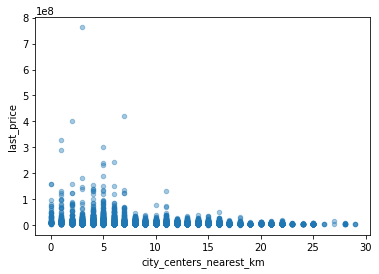

In [67]:
spb.plot(y='last_price', x='city_centers_nearest_km', kind='scatter', alpha=0.4)
spb[['last_price', 'city_centers_nearest_km']].corr()

<AxesSubplot:title={'center':'Цена от удаленности'}, xlabel='city_centers_nearest_km'>

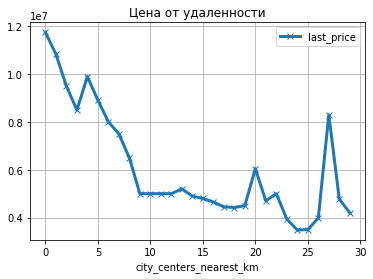

In [68]:
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')\
    .plot(grid=True, title='Цена от удаленности', label='цена от км', style='x-', linewidth=3)

чем ближе к центру , тем болше стоит , кроме выброса в 27км 

## Общий вывод

В проекте:
- очистка данных от пропуско 
    - замена пропусков где это возможно на 0 (например кол-во балконов)
    - замена на среднее по населенным пунктам 
    - удаление данных, где нельзя было заменить 
    - заменил анамалии 
- преобразование не явных дубликатов в населенных пунктах
- добавление клонок для дальшейшего анализа
    - цена одного квадратного метра
    - день недели публикации объявления 
    - месяц публикации объявления
    - год публикации объявления
    - тип этажа квартиры 
    - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
- изучил данне и вывел гистограммы следущих параметров для анализа
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления
что бы увидеть наглядно как параметры зависят друг от друга

- анализ от каких параметров зависит стоимость квартиры и скорость продажи квартиры
    - на boxplot хорошо видно , что значит быстро продать 
- где самый дорогой кв м и самый дешевый
- и так же график зависимости дальности от центра и стоимости квартиры 

после анализа могу сказать что дороже всего в Питере , быстрее всего квартиры продаеются с маленькой ценой и маленькой площадью, цена в основном зависит от общей площади квартиры

скорее всего , что бы квартыры продавались быстрее , нужно :
- увеличить внимание на квартиры дальше от центра 
- с большой площадью
- на квартиры на не удобных этажах 